In [1]:
import cv2
import numpy as np 

import tensorflow as tf
import matplotlib.pyplot as plt 
import tensorflow.contrib.keras as keras 
from tensorflow.contrib.keras import applications,layers,activations,models,losses,optimizers

from PIL import Image , ImageDraw
from PIL import Image,ImageDraw,ImageFilter

In [2]:
def swap(point):
    return (point[1],point[0])

def im_draw(image,point,size=20):
    im = image
    draw =ImageDraw.Draw(im)
    draw.ellipse((point[0],point[1],point[0]+ size , point[1] + size), fill = (255, 0, 0))
    return im

def scale_16_9(hight):
    return (int(hight * 16 / 9) , hight )

def to_arr(image):
    return np.array(image)[:, :, 0:3]


In [3]:
def match_template(goal,original):
    result = cv2.matchTemplate(goal, original, cv2.TM_CCOEFF_NORMED)
    point = np.unravel_index(result.argmax(), result.shape)
    return result,point,np.max(result)

max:0.93768 , point:(350, 173)


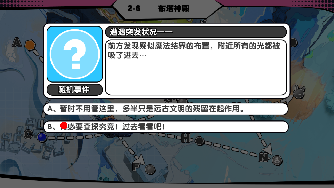

In [4]:
original_name = "../images-original/random-survey-2.png"
goal_name = "../images-goal/need-survey.png"

goal = cv2.imread(goal_name)
original = cv2.imread(original_name)

result,point,maxSim = match_template(goal,original)

print ("max:%s , point:%s" % (maxSim,point))
im_draw(Image.fromarray(original),point=swap(point)).resize(scale_16_9(188))

In [5]:
minValue = 10
maxValue = 20

In [6]:
original_edge = cv2.Canny(original,minValue,maxValue)
goal_edge = cv2.Canny(goal,minValue,maxValue)
Image.fromarray(goal_edge)

max:0.549824 , point:(350, 173)


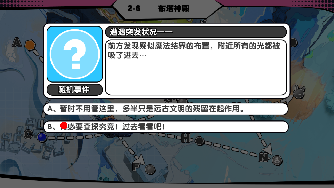

In [7]:
result,point,maxSim = match_template(goal_edge,original_edge)
print ("max:%s , point:%s" % (maxSim,point))
im_draw(Image.fromarray(original),point=swap(point)).resize(scale_16_9(188))


max:0.707557 , point:(445, 384)


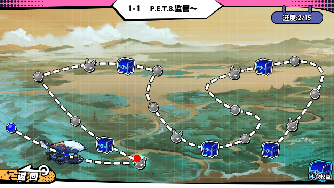

In [16]:
original_name = "../images-original/tx.png"
goal_name = "../images-goal/tx-3-finish.png"

goal = cv2.imread(goal_name)
original = cv2.imread(original_name)

result,point,maxSim = match_template(goal,original)

Image.fromarray(goal)
print ("max:%s , point:%s" % (maxSim,point))
im_draw(Image.fromarray(original),point=swap(point)).resize(scale_16_9(188))